In [15]:
from overlaps import (
    read_overlaps_from_file, merge_multiple_predictions, compute_crispr_overlaps
)
from misclassifications import get_misclassifications, label_misclassifications, LABELERS, groupby_gene
from main import OVERLAP_FILENAME
from df_loader import CrisprDFLoader, PredDFLoader
from schema import DFSchema
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100) 

In [16]:
CRISPR_FILENAME = "/oak/stanford/groups/engreitz/Projects/Benchmarking/CRISPR_data/EPCrisprBenchmark_ensemble_data_GRCh38.tsv.gz"
PRED_FILENAME = "/oak/stanford/groups/engreitz/Users/atan5133/ABC-Enhancer-Gene-Prediction/results/K562_dhs_peaks_ENCFF534DCE/Predictions/EnhancerPredictionsAllPutative.tsv.gz"
THRESHOLD = 0.009
TSS_REF_FILE = "resources/genome_annotations/RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed"

In [17]:
# overlaps = read_overlaps_from_file(OVERLAP_FILENAME)
pred_df = PredDFLoader(PRED_FILENAME, TSS_REF_FILE, THRESHOLD, score_col='ABC.Score').load()
crispr_df = CrisprDFLoader(CRISPR_FILENAME, TSS_REF_FILE).load()
overlap_df = compute_crispr_overlaps(
    crispr_df, pred_df
)
overlaps = merge_multiple_predictions(overlap_df, THRESHOLD)

/oak/stanford/groups/engreitz/Users/atan5133/.conda/envs/scripts/lib/python3.9/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_input_2[is_na_right] = None
/oak/stanford/groups/engreitz/Users/atan5133/.conda/envs/scripts/lib/python3.9/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_input_2[is_na_right] = None
/oak/stanford/groups/engreitz/Users/atan5133/.conda/envs/scripts/lib/python3.9/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompat

In [18]:
misclass_df = get_misclassifications(overlaps)
label_misclassifications(misclass_df)
pd.set_option('display.max_rows', 100) 

In [19]:
for labeler in LABELERS:
    print(labeler.summarize_category_count(misclass_df))
    print()

True    521
Name: FalsePos_Category, dtype: int64

True    146
Name: FalseNeg_Category, dtype: int64

DistToTSSSize_Category
medium (<= 100000 bp)    423
large (> 100000 bp)      153
small (<= 10000 bp)       91
Name: count, dtype: int64

Top5Gene_Category
COPZ1       14
ITGA5       13
MYC         12
BCAT2        9
RNASEH2A     9
Name: count, dtype: int64

True    73
Name: MultiplePredictions_Category, dtype: int64

EnhancerSize_Category
Normal    438
Large     229
Name: count, dtype: int64



In [20]:
relevant_cols = ['chrom_pred', 'start_crispr','end_crispr', 'name_crispr', 'distance_pred', 'activity_base_enh_pred', 'IsSignificant_crispr', 'IsSignificant_pred', 'ABC.Score.Numerator_pred', 'ABC.Score_pred', 'TargetGene_crispr']

In [21]:
false_pos = overlaps[(overlaps["IsSignificant_crispr"] == False) & (overlaps["IsSignificant_pred"] == True)]
group = false_pos.groupby("TargetGene_crispr")
group.size().sort_values()[-10:]

TargetGene_crispr
JUNB         5
CNBP         5
NFE2         6
NDUFB9       6
NUCB1        7
LYL1         7
BCAT2        9
RNASEH2A     9
ITGA5       13
COPZ1       14
dtype: int64

In [22]:
overlaps[relevant_cols].sort_values("activity_base_enh_pred", ascending=False)[:20]

,chrom_pred,start_crispr,end_crispr,name_crispr,distance_pred,activity_base_enh_pred,IsSignificant_crispr,IsSignificant_pred,ABC.Score.Numerator_pred,ABC.Score_pred,TargetGene_crispr
10222,chrX,49190908,49191428,PQBP1|chrX:49047365-49047885:*,293338.0,36.819624,False,False,0.035838,0.005208,PQBP1
9600,chrX,49190908,49191428,GATA1|chrX:49047365-49047885:*,404676.0,36.819624,False,False,0.025776,0.004352,GATA1
9805,chrX,49190908,49191428,HDAC6|chrX:49047365-49047885:*,389234.0,36.819624,False,False,0.026824,0.003226,HDAC6
10013,chrX,49190908,49191428,PLP2|chrX:49047365-49047885:*,19413.0,36.819624,False,True,0.578340,0.074962,PLP2
8286,chr7,23474172,23474763,TOMM7|chr7:23513791-23514382:.,651685.5,34.015092,False,True,0.014617,0.010733,TOMM7
8306,chr7,25862086,25862957,HNRNPA2B1|chr7:25901706-25902577:.,338245.5,30.940027,False,False,0.026027,0.006571,HNRNPA2B1
8303,chr7,25862086,25862957,CBX3|chr7:25901706-25902577:.,338662.5,30.940027,False,False,0.025994,0.006615,CBX3
8298,chr7,25862086,25862957,CYCS|chr7:25901706-25902577:.,737186.5,30.940027,False,False,0.011719,0.006114,CYCS
8152,chr6,53358275,53360065,FBXO9|chr6:53223073-53224863:.,288407.0,28.852409,False,True,0.028575,0.015199,FBXO9
10161,chrX,48737018,48737918,PQBP1|chrX:48595425-48596325:*,160430.5,28.451118,False,False,0.051380,0.007467,PQBP1


In [23]:
def get_pct_activity(df, in_pos=True):
    col_name = "activity_base_pred"
    filtered = df[df["IsSignificant_crispr"] == in_pos]
    return filtered[col_name].sum() / df[col_name].sum()
    

In [24]:
get_pct_activity(overlaps,in_pos=True)

0.07244785407441083

In [25]:
get_pct_activity(overlaps, in_pos=False)

0.9275521459255893

In [26]:
get_pct_activity(overlap_df, in_pos=True)

0.07178932395683295

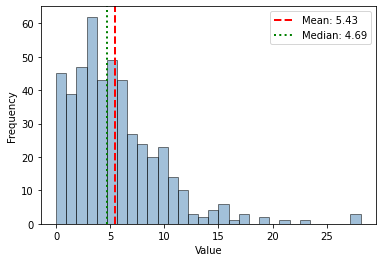

In [27]:
activites = overlaps[overlaps["IsSignificant_crispr"]]["activity_base_pred"].fillna(0)
mean_value = np.mean(activites)
median_value = np.median(activites)

plt.hist(activites, bins=30, alpha=0.5, color='steelblue', edgecolor='black')
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='dotted', linewidth=2, label=f'Median: {median_value:.2f}')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()